In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("/home/prasun/GitDemo/Exploring_EDA/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Shape of the DataFrame
df.shape

(3333, 20)

In [4]:
# Datatypes Involved:
categorical = [df.columns[n] for n,i in enumerate(df.dtypes) if i == "object"]
numeric = [df.columns[n] for n,i in enumerate(df.dtypes) if i != "object"]
print(f"Categorical Columns: {categorical}\n\nNumeric Column: {numeric}")

Categorical Columns: ['State', 'International plan', 'Voice mail plan']

Numeric Column: ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [5]:
#Let's have a general statistical idea about the dataset
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# More general Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

##### Insights:
- No NULL values
- Out of 20 features 16 are numeric, 3 Categrical and 1 boolian type(target)



In [7]:
#Changing column datatype
df.Churn = df.Churn.astype("int64")
df.Churn.dtype

dtype('int64')

In [8]:
# Statistical Information on Qualitative Data
df.describe(include=["object","bool"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [9]:
# Value Counts (figure)
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [10]:
# Value Counts (proportion)
df["Churn"].value_counts(normalize =True)

Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [11]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [12]:
#Sorting a DataFrame
df.sort_values(by="Total night minutes", ascending= False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2663,VA,172,510,No,No,0,169.8,123,28.87,183.1,94,15.56,395.0,72,17.77,12.7,7,3.43,2,0
1317,NE,89,415,No,Yes,29,163.5,80,27.80,274.8,136,23.36,381.9,147,17.19,7.5,5,2.03,2,0
1445,ID,55,510,No,Yes,8,222.5,104,37.83,171.5,94,14.58,377.5,114,16.99,9.7,2,2.62,1,0
2321,AR,153,408,No,No,0,154.6,56,26.28,263.0,84,22.36,367.7,89,16.55,15.5,2,4.19,1,0
3107,GA,73,408,No,No,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,0


In [13]:
# Average value of numeric feature
df.Churn.mean()

0.14491449144914492

In [14]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

In [15]:
#Average Value of Numeric Feature of Churned Customer
ch1 = df.drop(["State","International plan","Voice mail plan"], axis= 1)[df.Churn == 1].mean()
print(ch1)

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64


In [16]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [17]:
# Symptoms in Customer service calls
x1 =df["Customer service calls"][df.Churn == 0].describe()
x2 = df["Customer service calls"][df.Churn == 1].describe()
print(f"Loyal Customers: \n{x1}\n\nChurned Customers:\n{x2}")

Loyal Customers: 
count    2850.000000
mean        1.449825
std         1.163883
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Customer service calls, dtype: float64

Churned Customers:
count    483.000000
mean       2.229814
std        1.853275
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: Customer service calls, dtype: float64


It is clear that Higher `Customer Service Calls` is prevalant in churned customers

In [18]:
#maximum length of international calls among loyal users (Churn == 0) who do not have an international plan
df[(df.Churn == 0) & (df["International plan"]== "No")]['Total intl minutes'].describe()

count    2664.000000
mean       10.185473
std         2.820070
min         0.000000
25%         8.400000
50%        10.200000
75%        12.100000
max        18.900000
Name: Total intl minutes, dtype: float64

In [19]:
#Data Frame Indexing iloc[indexing by number]/loc[indexing by name]
df.loc[:3,['Total night minutes','Total intl charge', 'Churn']], df.iloc[:3,[-8,-3,-1]]

(   Total night minutes  Total intl charge  Churn
 0                244.7               2.70      0
 1                254.4               3.70      0
 2                162.6               3.29      0
 3                196.9               1.78      0,
    Total night minutes  Total intl charge  Churn
 0                244.7               2.70      0
 1                254.4               3.70      0
 2                162.6               3.29      0)

In [20]:
# apply() method in pandas.Dataframe classs
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [21]:
# States starting with "W"
df[df.State.apply(lambda x: x[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


In [22]:
# Replacing Value with map() & replace()
label = {"Yes":1,"No":0}
df["Voice mail plan"].map(label)
df["Voice mail plan"].replace(label)

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: Voice mail plan, Length: 3333, dtype: int64

In [23]:
#Grouping
column= ["Total day minutes", "Total eve minutes", "Total night minutes"]
df.groupby(["Churn"])[column].mean()

,Total day minutes,Total eve minutes,Total night minutes
Churn,,,
0,175.175754,199.043298,200.133193
1,206.914079,212.410145,205.231677


In [24]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]
df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std  min    max              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
        min    max                mean        std   min    max  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

In [25]:
# Summary Tables
pd.crosstab(df["Churn"],df["International plan"])

International plan,No,Yes
Churn,,
0,2664,186
1,346,137


In [26]:
pd.crosstab(df["Voice mail plan"],df["International plan"],normalize= True)

International plan,No,Yes
Voice mail plan,,
No,0.654065,0.069307
Yes,0.249025,0.027603


In [27]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [28]:
#Pivot Tables
df.pivot_table(values=['Total day charge', 'Total eve minutes'],index=["Churn"],aggfunc={"Total day charge":'max',"Total eve minutes":"mean"})

,Total day charge,Total eve minutes
Churn,,
0,53.65,199.043298
1,59.64,212.410145


In [29]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [30]:
#Dataframe wise addition
total_calls = df['Total day minutes']+df['Total eve minutes']+df['Total night minutes']+df['Total intl minutes']
df.insert(loc=len(df.columns),column="Total call time",value= total_calls)

In [31]:
#Alter without intermediate column
df["Toatal call count"] = df['Total intl minutes']+df['Total eve calls']+df['Total night calls']+df['Total intl calls']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total call time,Toatal call count
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,717.2,203.0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,625.2,222.7
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,539.4,231.2
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,564.8,190.6
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,512.0,256.1


In [32]:
# Droping Axis
df.drop(["Toatal call count","Total call time"], axis= "columns", inplace= True)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Mainstream Exploration


In [33]:
pd.crosstab(df["Churn"],df["International plan"],margins= True, margins_name= "Sub_Total")

International plan,No,Yes,Sub_Total
Churn,,,
0,2664,186,2850
1,346,137,483
Sub_Total,3010,323,3333


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

<Axes: xlabel='International plan', ylabel='count'>

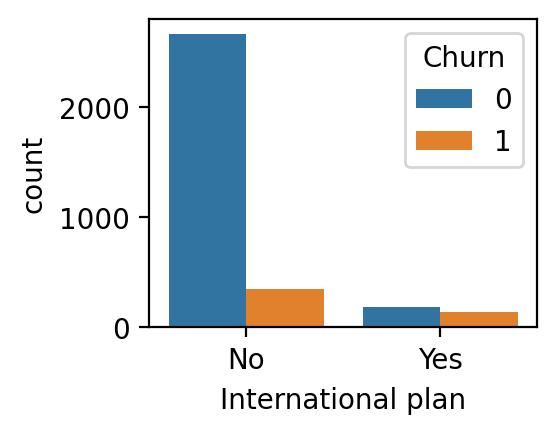

In [37]:
plt.figure(figsize= (2.5,2))
sns.countplot(x= df["International plan"], hue= df["Churn"])